In [1]:
import random

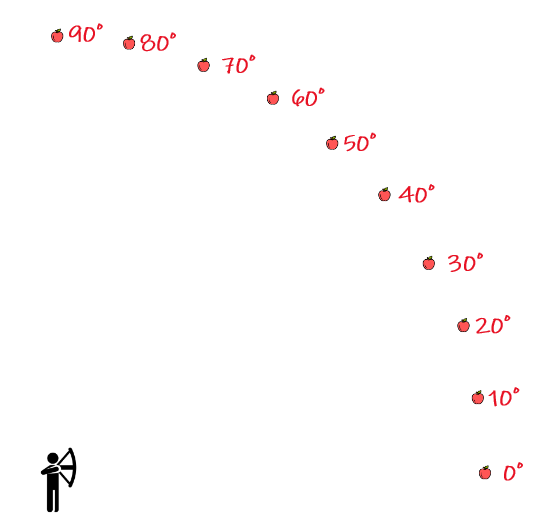
<p>O ambiente é composto por um campo com 10 alvos dispostos a cada 10º de um campo de visão de 90º</p>
<p>O agente é atirador</p>
<p>O sensor é o olho do atirador</p>
<p>O atuador é o arco e flecha</p>
<p>No inicio da rodada um dos alvos é definido como premiado e o objetivo do agente é acerta-lo</p>

In [2]:
class Env:
    def __init__(self):
        self.targets = [i for i in range(0,100,10)]
        self.reset()
        
    # atualiza o estado de acordo com a ação
    def step(self, action):
        self.last_target = action
        print(f'Env: o alvo {action} foi atingido')
        return action == self.target
        
    # retorna um alvo aleatorio
    def get_random_target(self):
        return random.randint(0,len(self.targets))
    
    # restaura o estado inicial do ambiente
    def reset(self):
        # escolhe um dos alvos para ser o objetivo
        self.target = random.randint(0,len(self.targets))
        print(f'Env: o alvo premiado é o {self.target}')
        self.last_target = None

In [3]:
class Agent:
    def __init__(self, env):
        self.env = env
        
    def calc_new_target(self, reward):
        reward = 'esquerda' if reward > 0 else 'direita'
        direction = -1 if reward == 'direita' else 1
        
        print(f'Agent: o angulo foi ajustado para a {reward}')
        return self.env.last_target + direction
        
    # baseado no conhecimento do agente, retorna qual ação devera ser tomada no estado atual
    def chose(self, reward=None):
        new_target = self.env.get_random_target()
        if self.env.last_target is not None: # caso não seja o primeiro tiro
            new_target = self.calc_new_target(reward)
        
        print(f'Agent: o alvo escolhido foi o {new_target}')
        return new_target

In [4]:
class Actuator:
    def __init__(self,env):
        self.env = env
    
    # executa a ação
    # true = alvo certo
    # false = alvo errado
    def act(self, action):
        print(f'Actuator: disparando no alvo {action}')
        return self.env.step(action)

In [5]:
class Sensor:
    def __init__(self,env):
        self.env = env
    
    # calcula a recompensa da ação no estado atual
    def calc_reward(self):
        reward = self.env.target - self.env.last_target
        print(f'Sensor: recompensa pelo disparo = {reward}')
        return reward

In [6]:
env = Env()
agent = Agent(env)
actuator = Actuator(env)
sensor = Sensor(env)

target = agent.chose()
is_end = actuator.act(target)
while not is_end:
    reward = sensor.calc_reward()
    target = agent.chose(reward)
    is_end = actuator.act(target)
print('O alvo premiado foi atingido!')    

Env: o alvo premiado é o 7
Agent: o alvo escolhido foi o 3
Actuator: disparando no alvo 3
Env: o alvo 3 foi atingido
Sensor: recompensa pelo disparo = 4
Agent: o angulo foi ajustado para a esquerda
Agent: o alvo escolhido foi o 4
Actuator: disparando no alvo 4
Env: o alvo 4 foi atingido
Sensor: recompensa pelo disparo = 3
Agent: o angulo foi ajustado para a esquerda
Agent: o alvo escolhido foi o 5
Actuator: disparando no alvo 5
Env: o alvo 5 foi atingido
Sensor: recompensa pelo disparo = 2
Agent: o angulo foi ajustado para a esquerda
Agent: o alvo escolhido foi o 6
Actuator: disparando no alvo 6
Env: o alvo 6 foi atingido
Sensor: recompensa pelo disparo = 1
Agent: o angulo foi ajustado para a esquerda
Agent: o alvo escolhido foi o 7
Actuator: disparando no alvo 7
Env: o alvo 7 foi atingido
O alvo premiado foi atingido!
